## 1. Import the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the Data

In [5]:
visa_df = pd.read_csv(r"C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## 3. Divide the data into numerical and categorical columns

In [9]:
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

## 4. Categorical Column Analysis

In [13]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [15]:
uniq = []
for i in visa_df['continent']:
    if i not in uniq:
        uniq.append(i)
uniq

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']

In [17]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [19]:
leng = []
for i in uniq:
    con = visa_df['continent'] == i
    leng.append(len(visa_df[con]))
leng

[16861, 551, 3292, 3732, 852, 192]

In [21]:
pd.DataFrame( leng,uniq)

,0
Asia,16861
Africa,551
North America,3292
Europe,3732
South America,852
Oceania,192


In [23]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

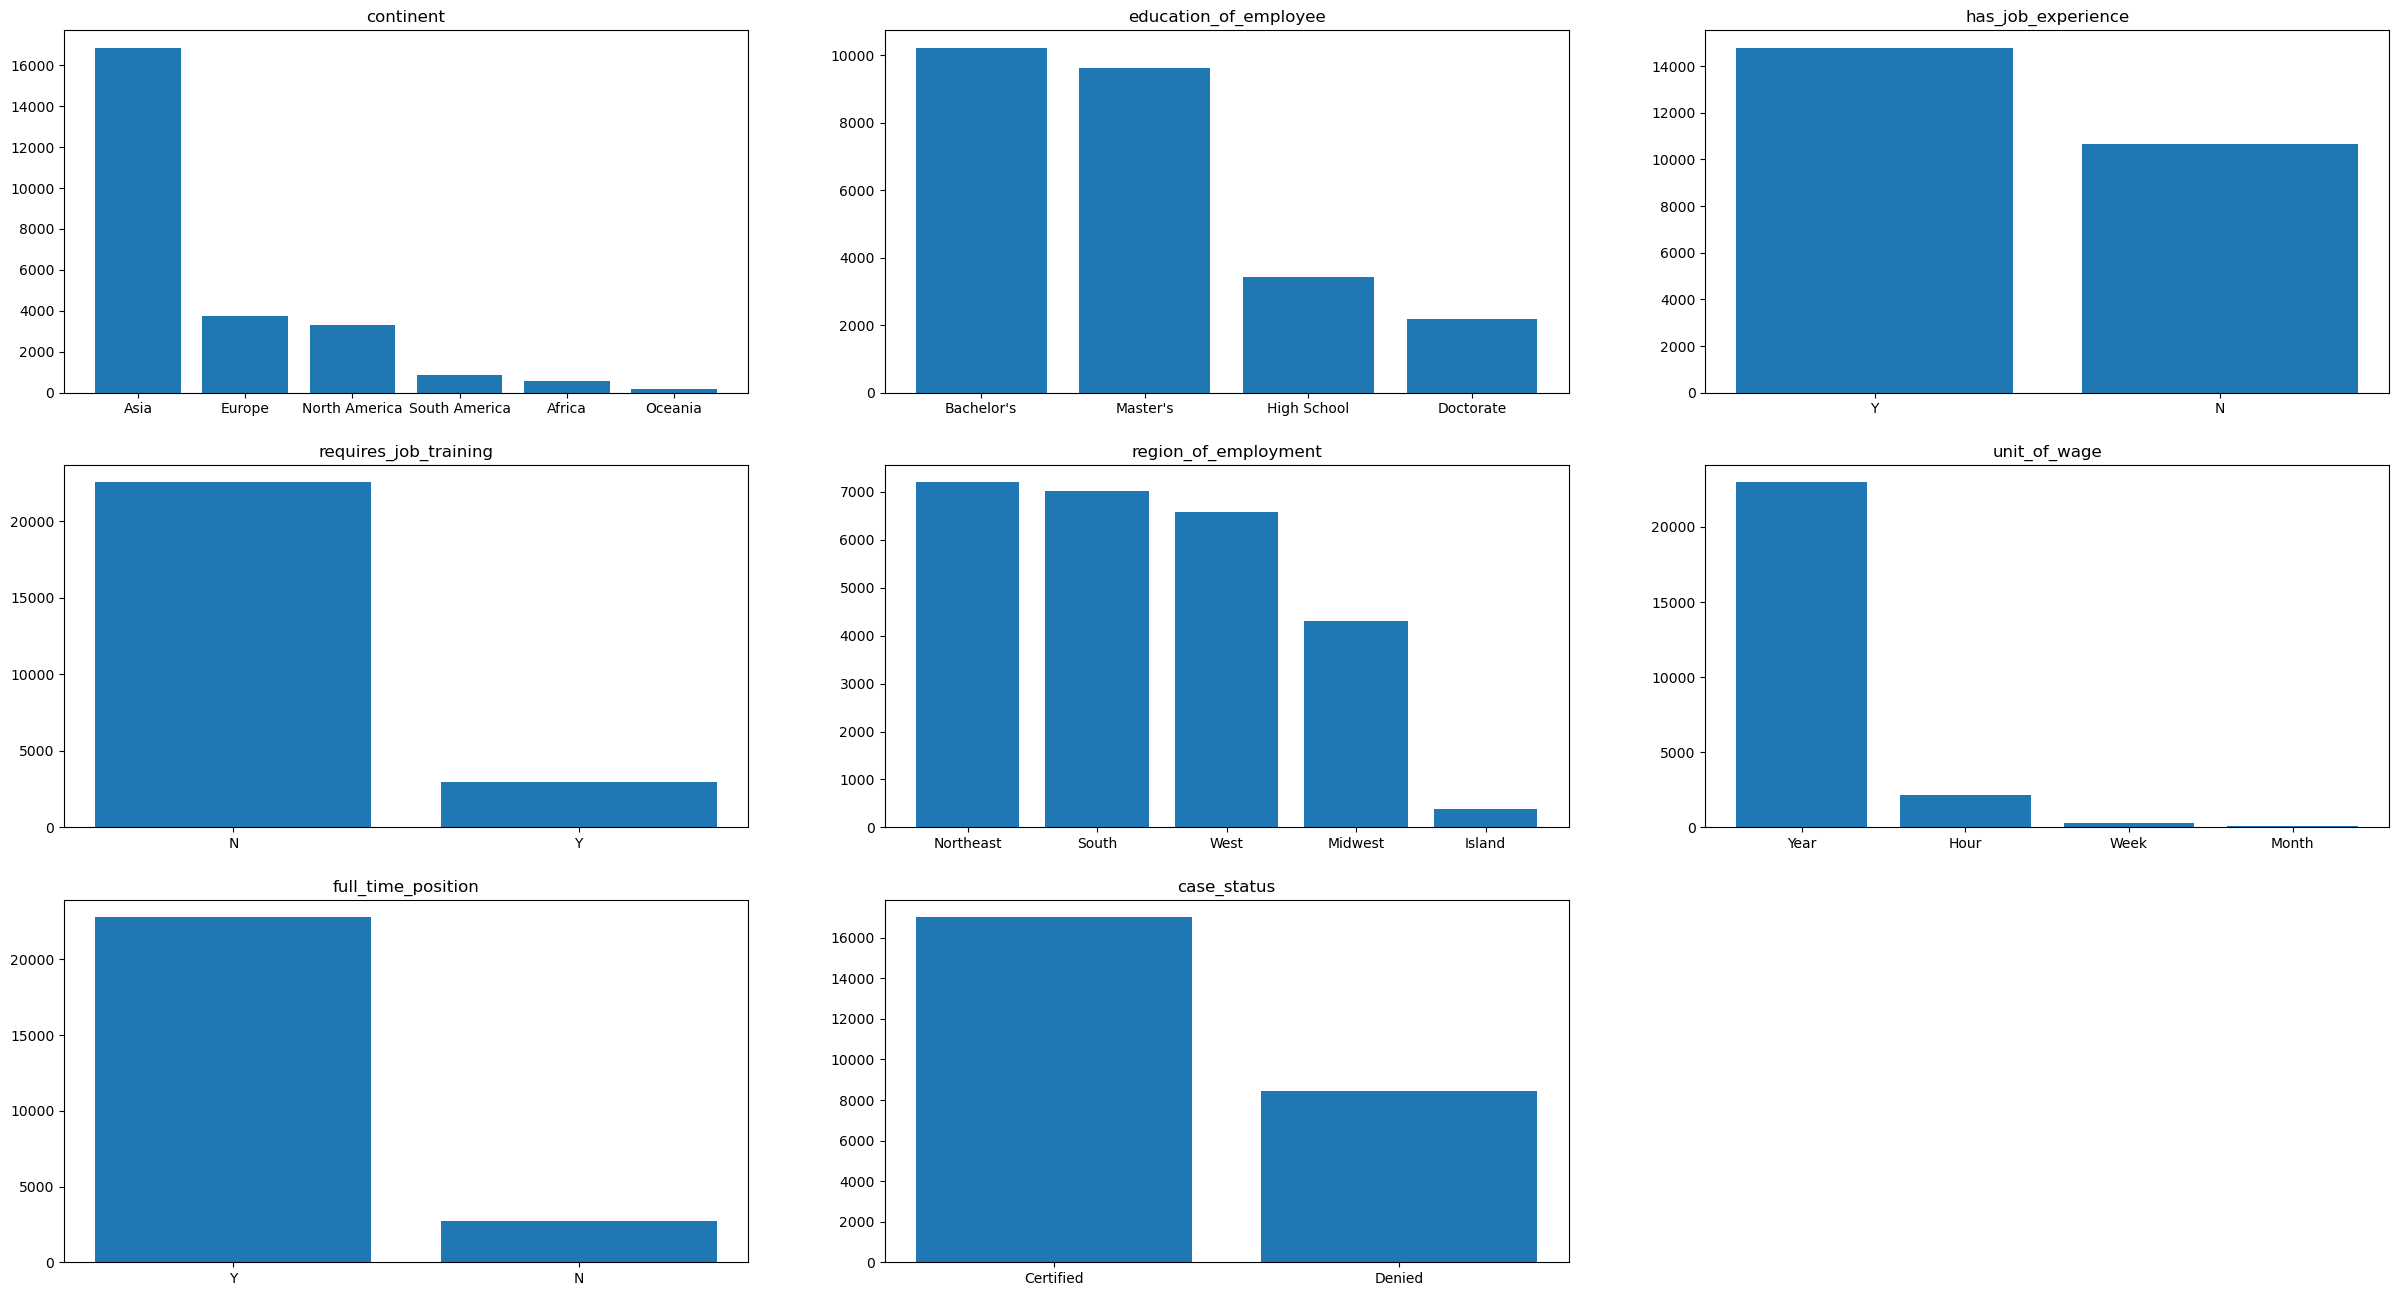

In [25]:
plt.figure(figsize = (30,16))
for i in range(1,len(cat)):
    keys = visa_df[cat[i]].value_counts().keys()
    value = visa_df[cat[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.title(f'{cat[i]}')
    plt.bar(keys,value)

### 5. Save the Graphs in separate folder

In [29]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\D.JYOTSNA\\OneDrive\\Documents\\Full Stack Data Science\\3. EDA\\EDA'

[WinError 183] Cannot create a file when that file already exists: 'bargraphs'


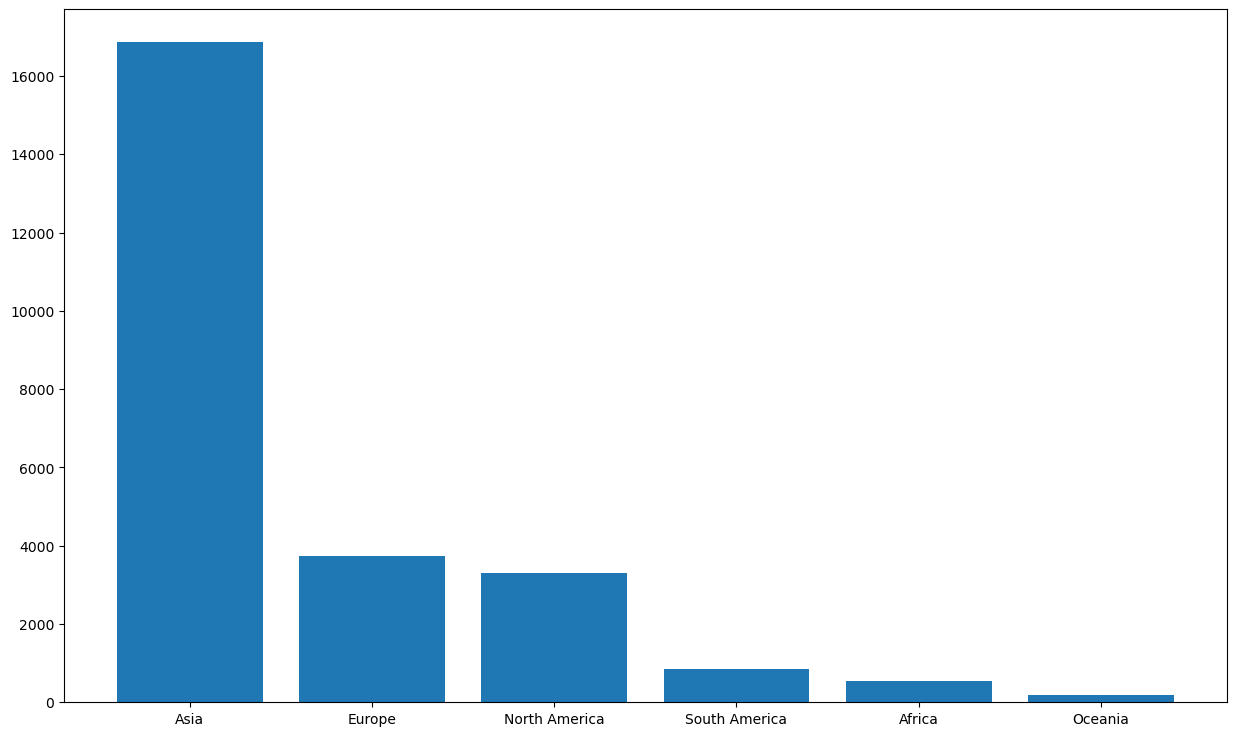

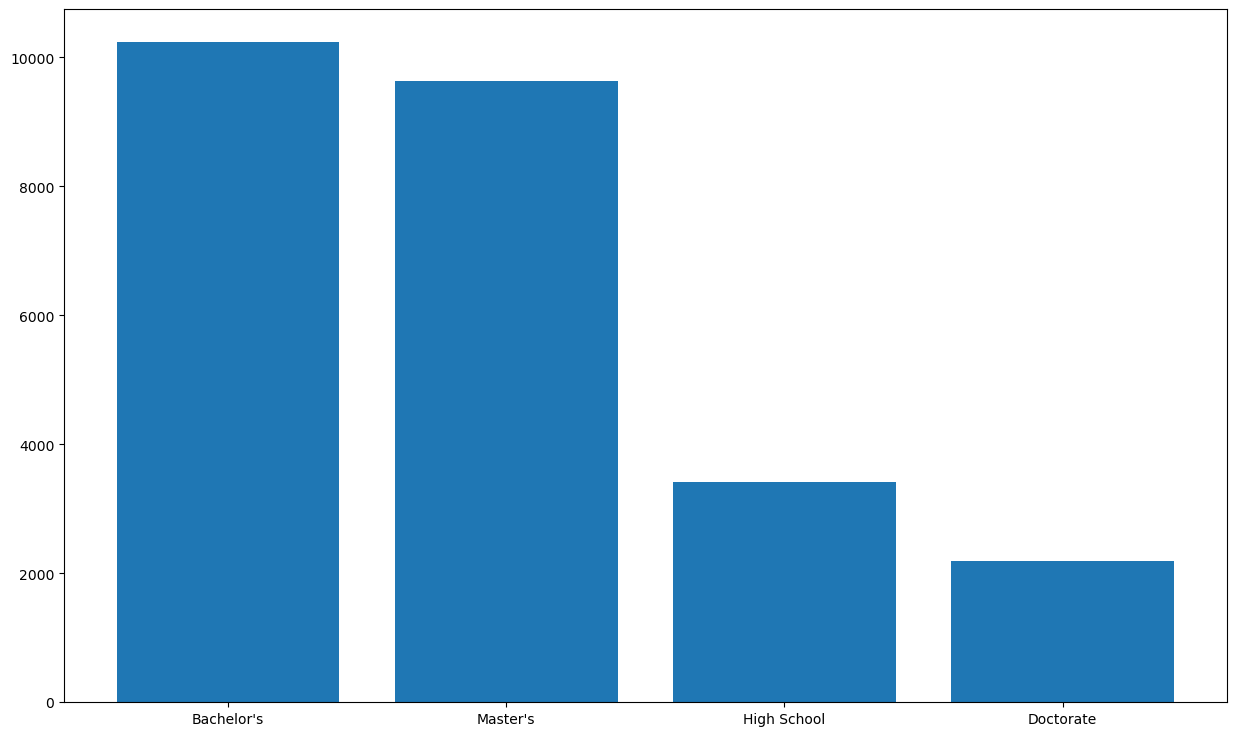

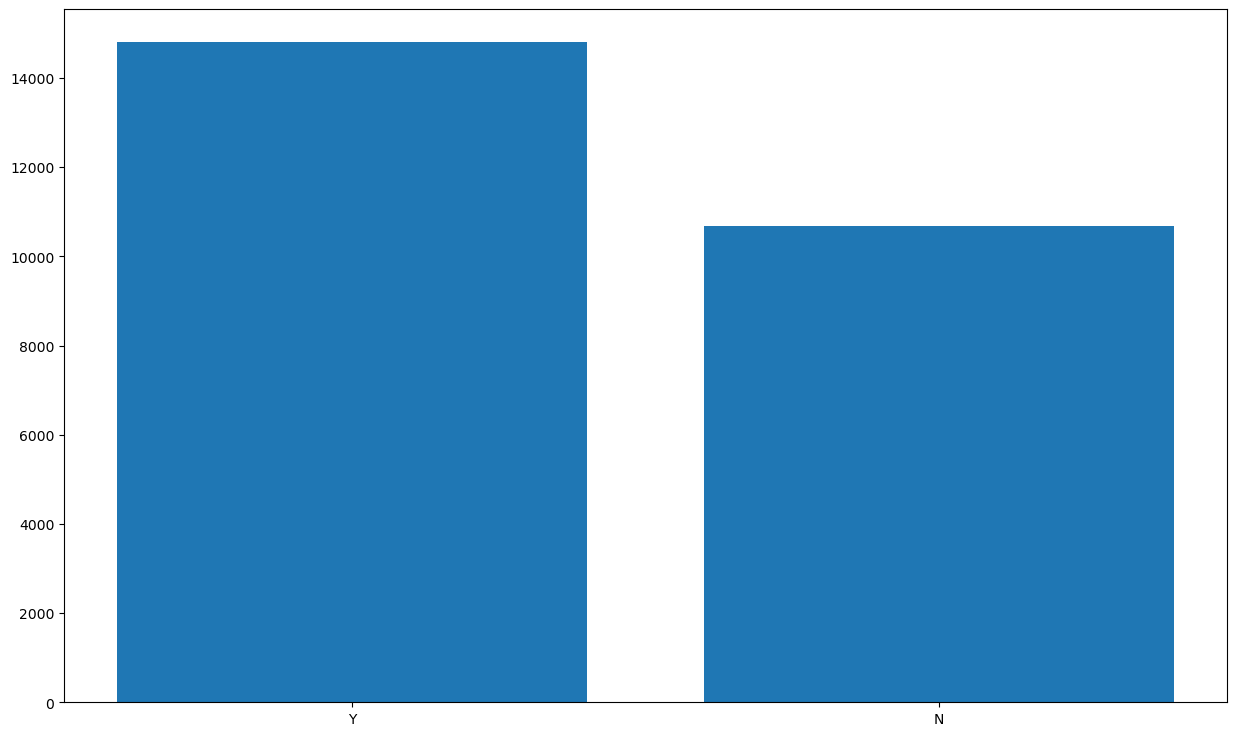

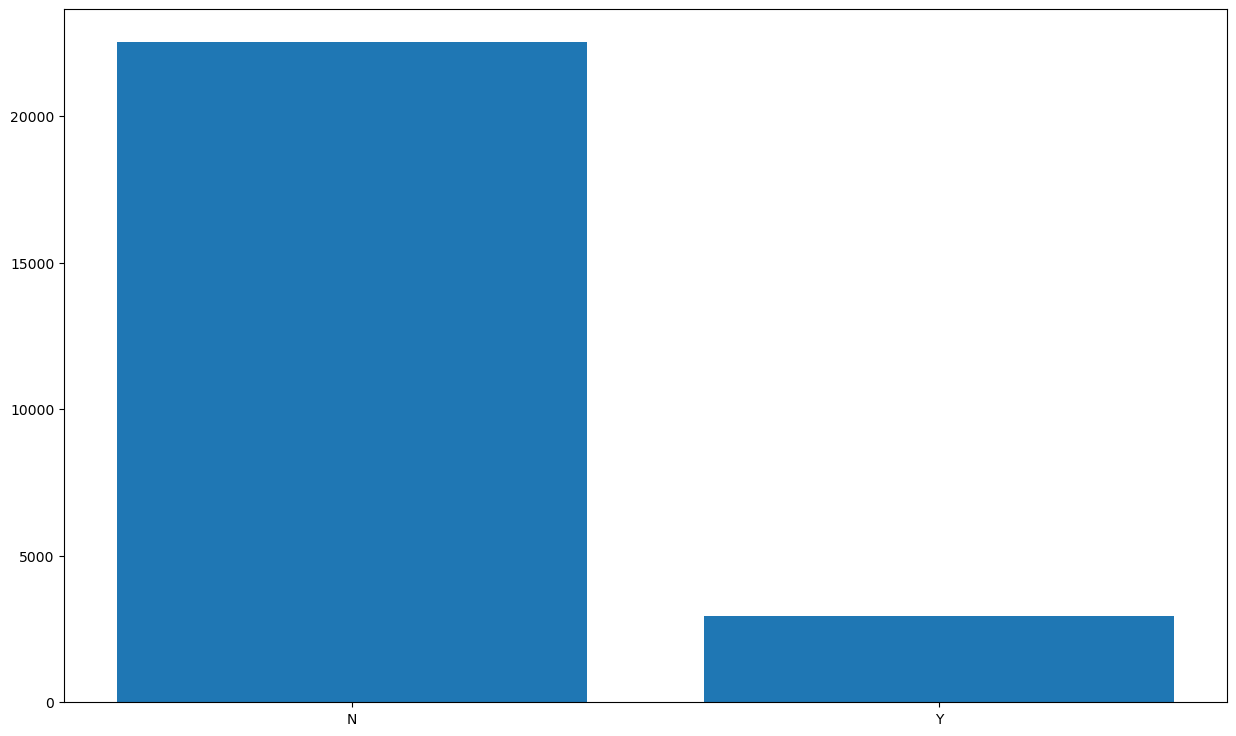

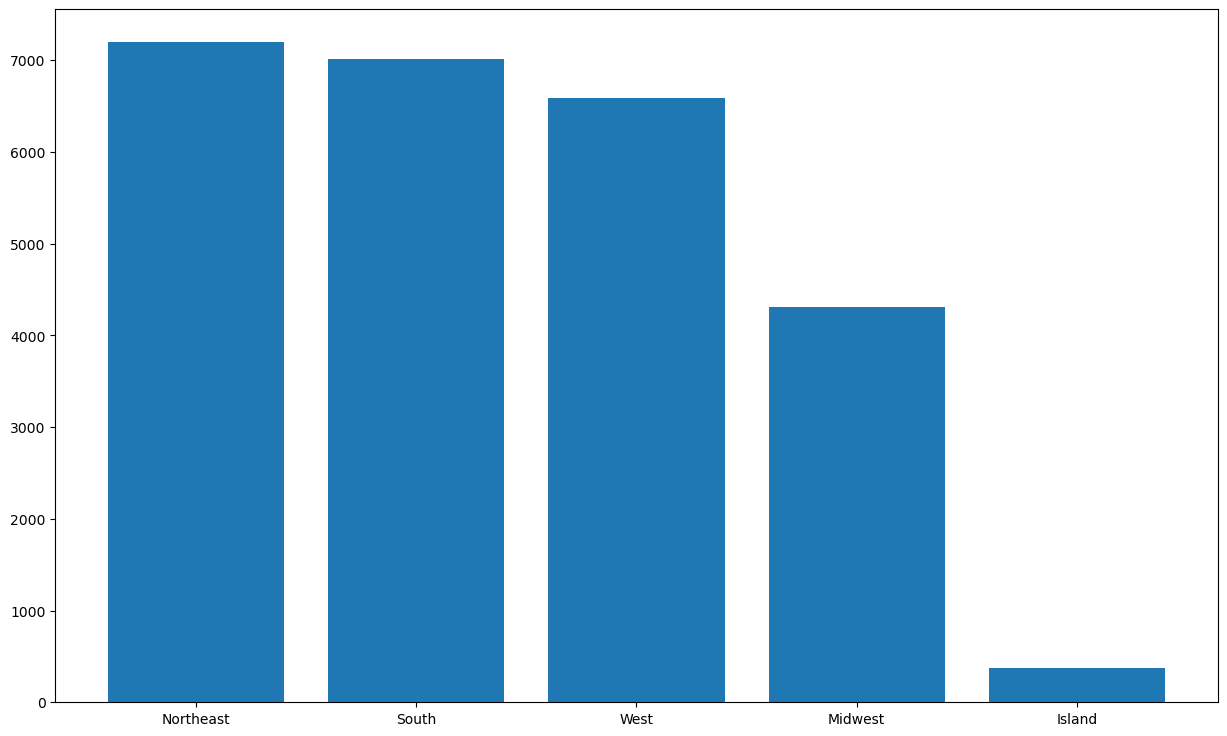

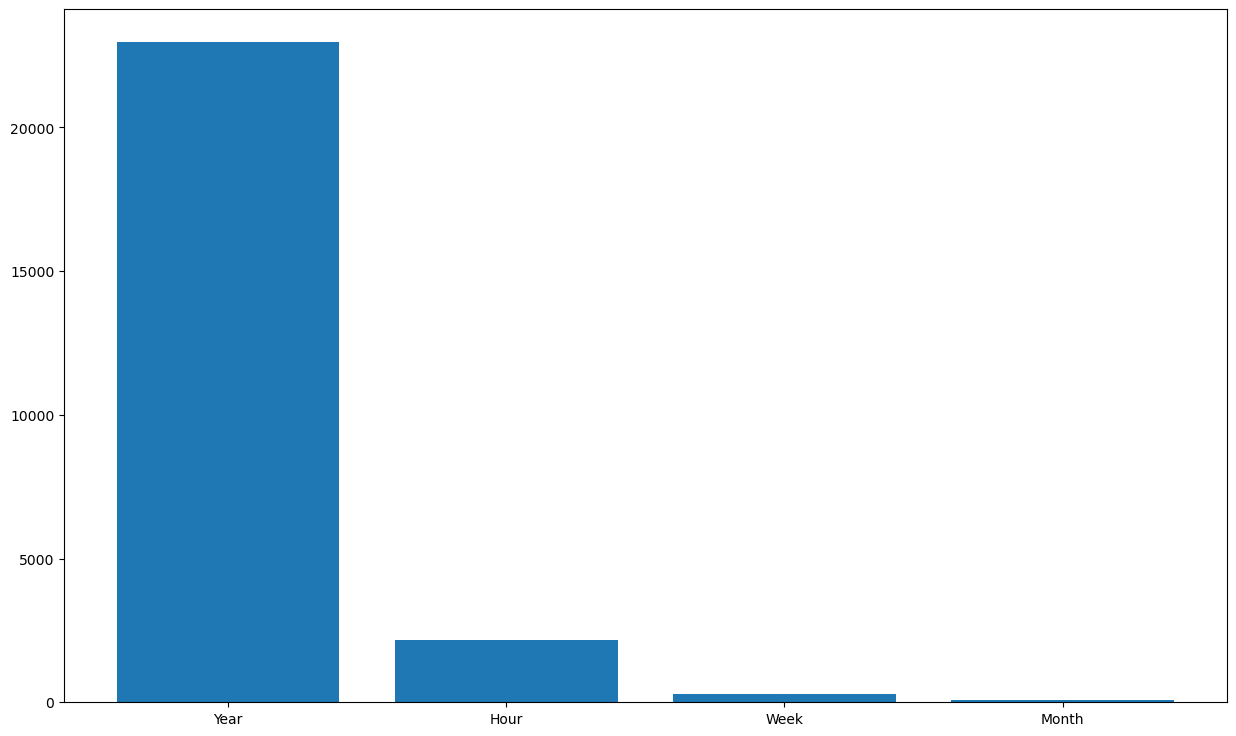

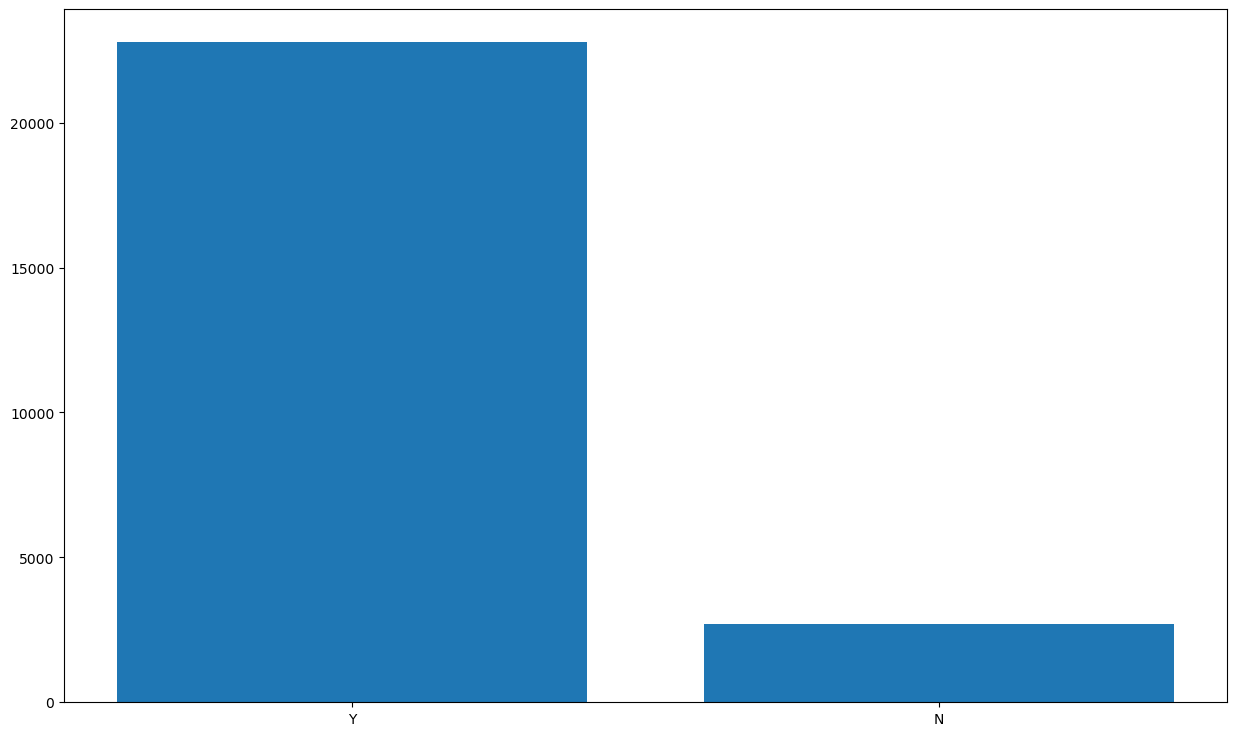

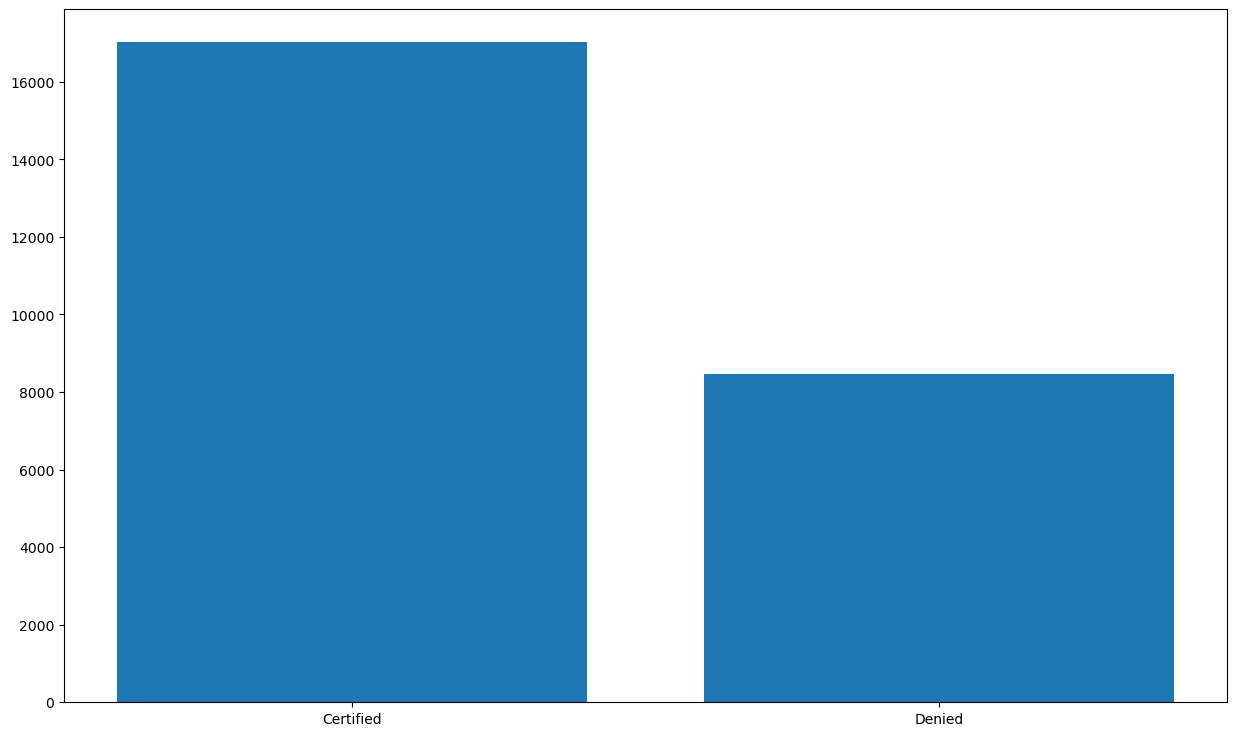

In [35]:
filename = 'bargraphs'
try:
    os.makedirs(filename)
except Exception as e:
    print(e)

folder_path = os.path.join(cwd,filename)
cat = visa_df.select_dtypes(include = 'object').columns
for i in cat[1:]:
    keys = visa_df[i].value_counts().keys()
    value = visa_df[i].value_counts().values
    
    new_file = f'{i}.jpg'
    path = os.path.join(folder_path,new_file)
    
    plt.figure(figsize = (15,9))
    plt.bar(keys,value)
    plt.savefig(path)

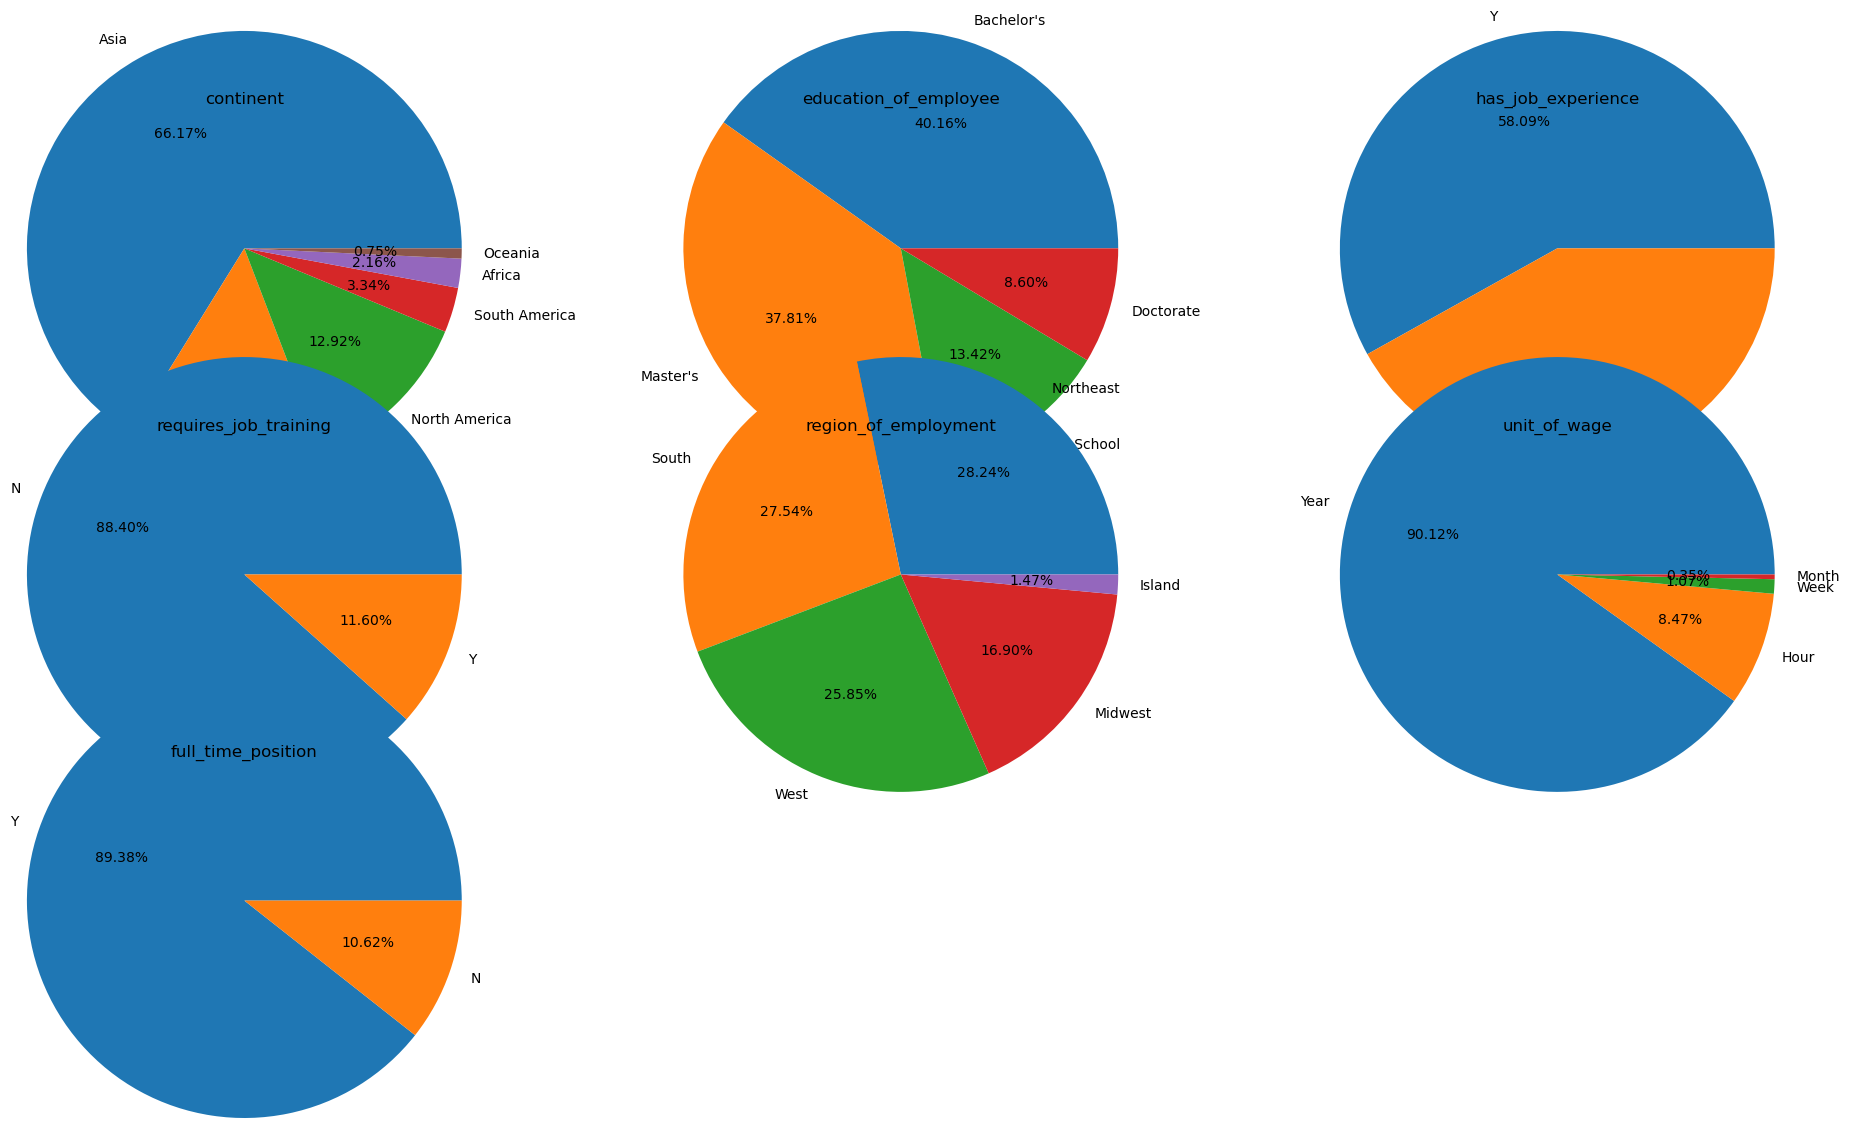

In [31]:
plt.figure(figsize = (24,12))
for i in range(1,len(cat[1:])):
    keys = visa_df[cat[i]].value_counts().keys()
    value = visa_df[cat[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.title(f'{cat[i]}')
    plt.pie(value,
            labels = keys,
            autopct='%.2f%%',
            radius = 2)

[WinError 183] Cannot create a file when that file already exists: 'pie-charts'


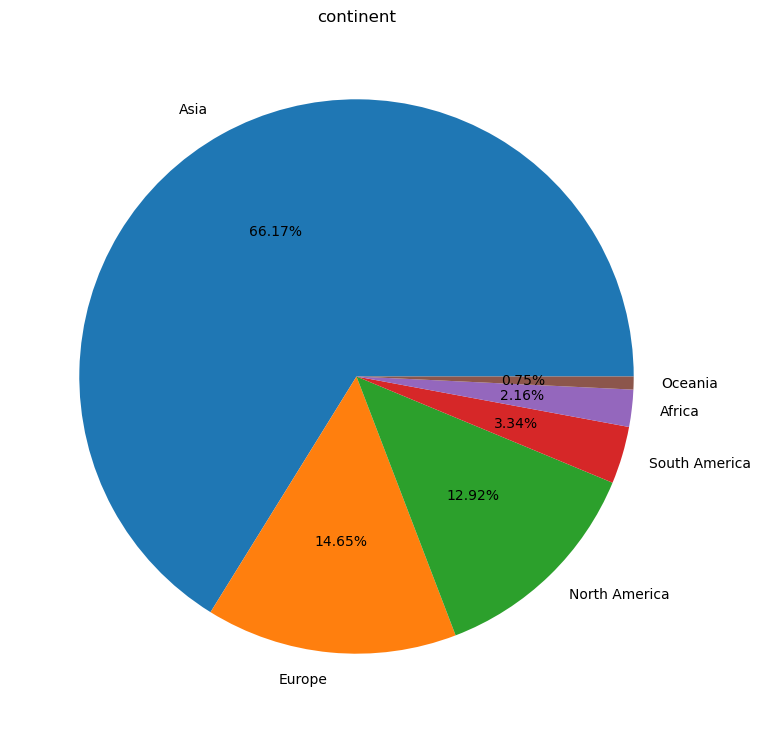

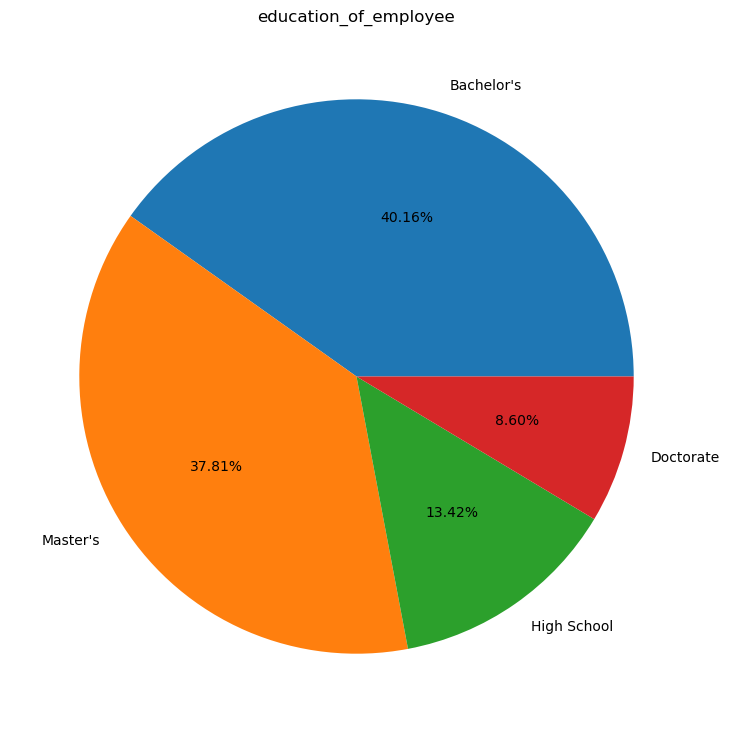

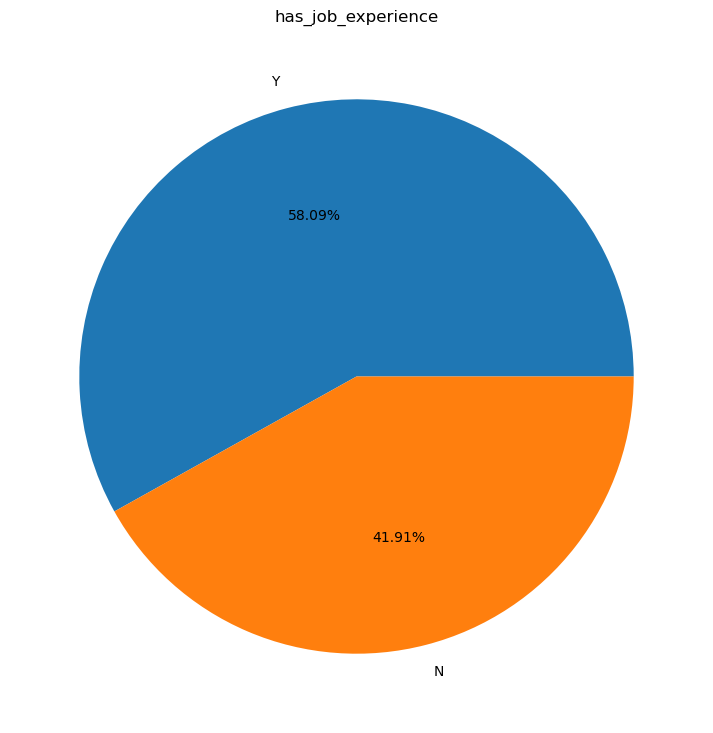

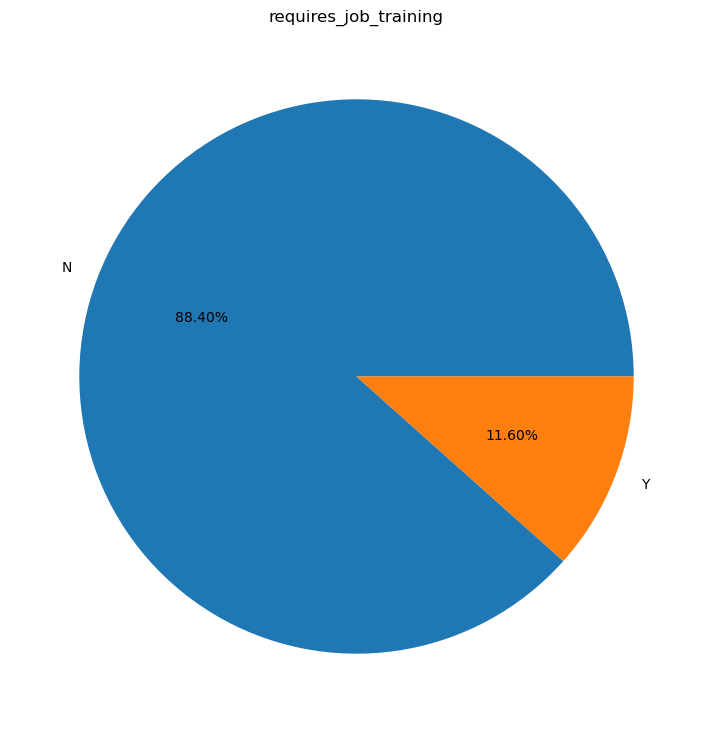

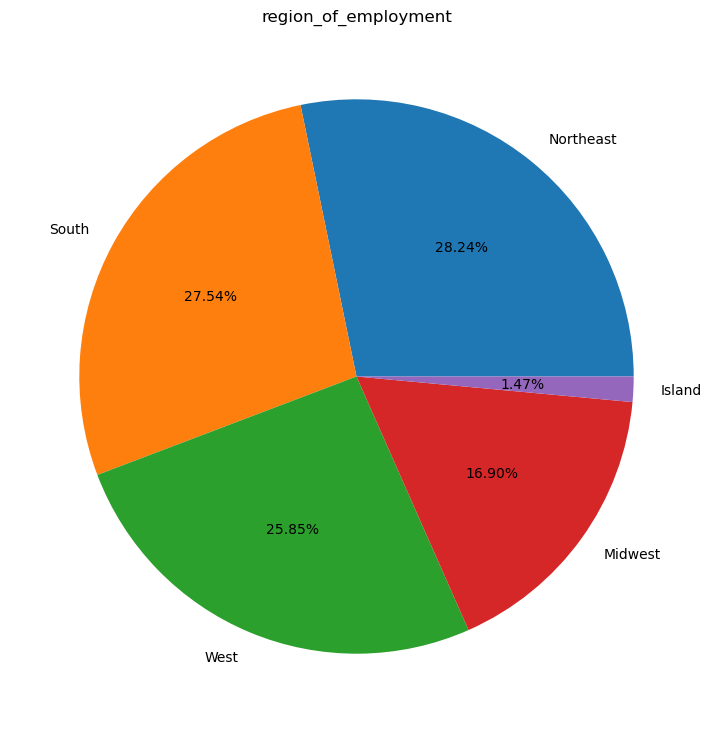

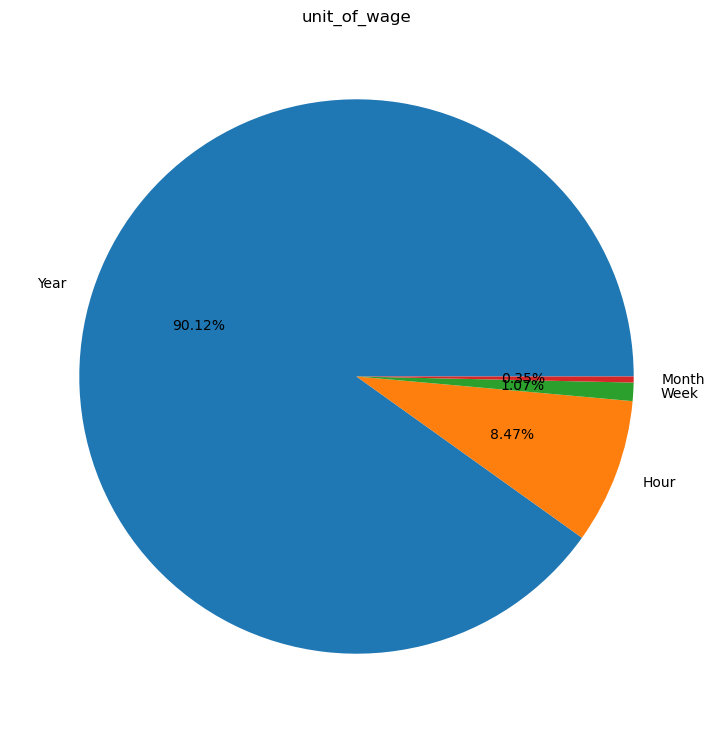

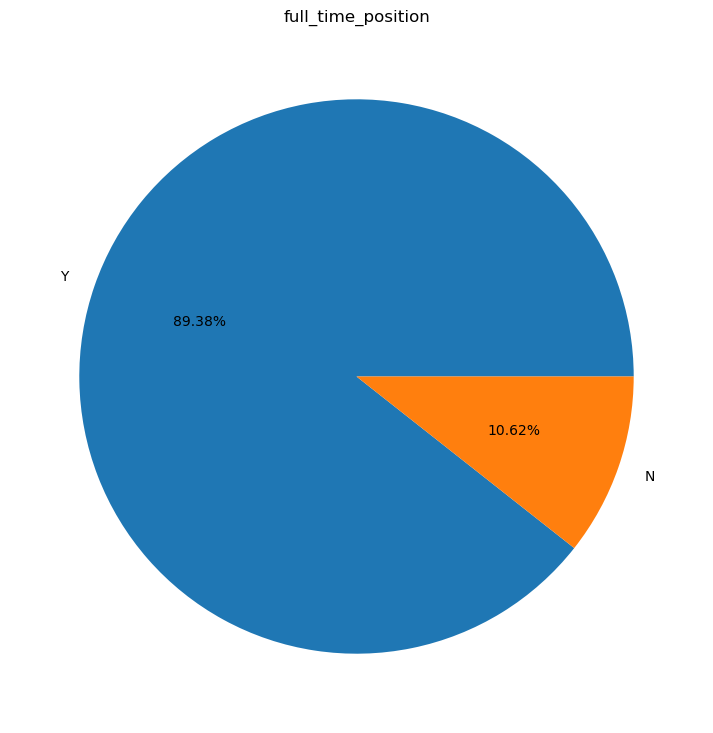

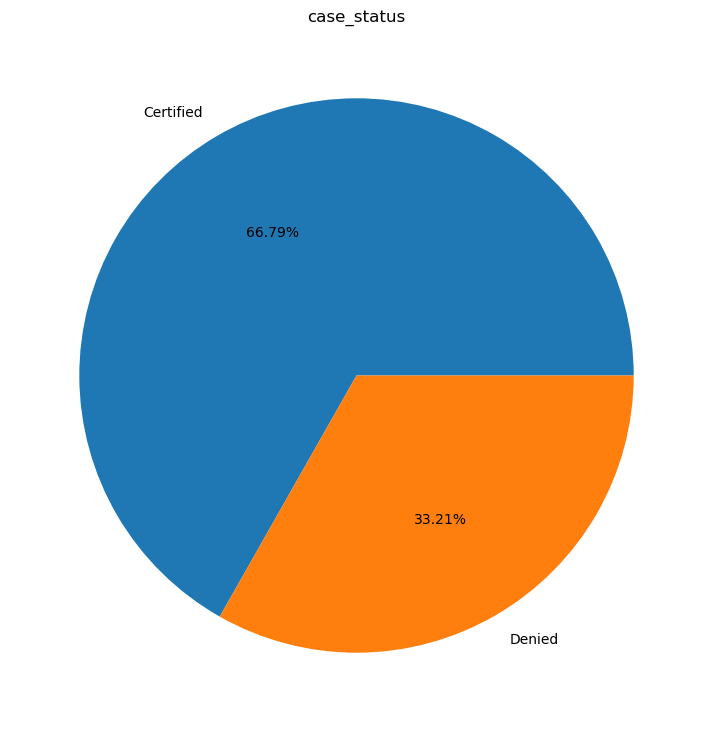

In [35]:
filename = 'pie-charts'
try:
    os.makedirs(filename)
except Exception as e:
    print(e)

cwd = os.getcwd()
new_path = os.path.join(cwd,filename)

cat = visa_df.select_dtypes(include = 'object').columns
for i in cat[1:]:
    keys = visa_df[i].value_counts().keys()
    value = visa_df[i].value_counts().values
    
    file = f'{i}.jpg'
    path = os.path.join(new_path,file)
    plt.figure(figsize = (16,9))
    
    plt.title(f'{i}')
    plt.pie(value,labels=keys,autopct='%.2f%%',radius=1)
    plt.savefig(path)